# ES32
## Noemi Baruffolo 5^AROB
### pag.191 es.2
Cerca su Internet degli open data sulla serie storica annuale della popolazione mondiale degli ultimi 50 anni.
Scarica poi i dati e con essi:
* crea un dataframe contenente i dati e rappresentali
in un grafico;
* addestra una regressione lineare per rilevare se è
presente un trend;
* utilizzando la regressione che hai creato, fai una previsione della popolazione mondiale tra dieci anni.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [88]:
data = pd.read_csv("csv/population.csv")
data

,Entity,Code,Year,Population (historical)
0,Africa,NaN,-10000,1118546
1,Africa,NaN,-9000,1214579
2,Africa,NaN,-8000,1355402
3,Africa,NaN,-7000,1563759
4,Africa,NaN,-6000,1874767
...,...,...,...,...
1711,World,OWID_WRL,2019,7811293714
1712,World,OWID_WRL,2020,7887001284
1713,World,OWID_WRL,2021,7954448405
1714,World,OWID_WRL,2022,8021407170


In [89]:
usefulData = data[data["Entity"] == "World"].dropna()
usefulData = usefulData[usefulData["Year"] > 1950]

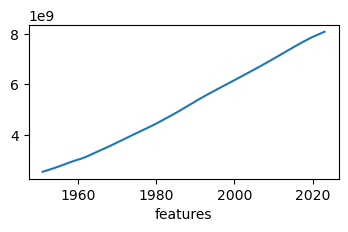

In [90]:
fig, ax = plt.subplots(figsize=(4,2))
features = usefulData["Year"]
target = usefulData["Population (historical)"]
ax.plot(features, target)
ax.set_xlabel("features")
ax.set_ylabel("")
plt.show()

In [91]:
x = features.values
y = target.values

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)

In [93]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

model = LinearRegression(fit_intercept=True)

In [94]:
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression()

In [95]:
model.score(x.reshape(-1, 1), y.reshape(-1, 1))

0.9968324685027168

In [96]:
anno = 2030
model.predict(np.array(anno).reshape(-1, 1))

array([[8.59293374e+09]])

### pag.191 es.4
Scarica MonthElb_012010_004028900.csv.
Il file contiene le misure meteorologiche dell'anno 2010 con cadenza oraria, per una stazione meteo italiana. Le colonne nel file, da sinistra a destra, sono:
1. DATA
2. ORA: espressa nel sistema UTC
3. ID_RETE_MONIT: identificativo della Rete di Monitoraggio
4. CODICE_ISTAT_ COMUNE: identificativo della stazione secondo codifica ISTAT
5. PROGR_PUNTO_COM: numerazione progressiva delle stazioni con medesimo codice ISTAT
6. VELV: velocità del vento
7. DIRV: direzione del vento
8. DEVST: deviazione standard della velocità trasversale
9. BARO: pressione atmosferica
10. TERMA: temperatura dell'aria
11. IGRO: umidità relativa
12. RADD: radiazione solare diretta
13. RADR: radiazione solare riflessa
14. PLUV: precipitazione
In caso di valori mancanti è riportato il numero 9999.9.
Con questi dati:
* crea un dataframe di pandas con i dati in esso contenuti ed effettua la pulitura dei dati;
* crea un modello di regressione lineare utile a predire la temperatura dell'aria corrente a partire dalle altre feature presenti nei dati. Sperimenta diverse regressioni che utilizzano diverse feature.
Quali sono le feature che consentono di realizzare la regressione più accurata nel predire la temperatura? Motiva la risposta.

In [98]:
dati = pd.read_csv("csv/MonthElb_012010_004028900.csv", header = None, na_values = 9999.9)
dati

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,01-01-2010,00:00,17,4028,900,0.4,175.7,NaN,925.7,1.3,84.0,NaN,NaN,0.0
1,01-01-2010,01:00,17,4028,900,0.0,NaN,NaN,925.1,1.3,84.0,NaN,NaN,0.0
2,01-01-2010,02:00,17,4028,900,0.6,197.0,NaN,924.6,1.4,84.0,NaN,NaN,0.0
3,01-01-2010,03:00,17,4028,900,0.9,187.1,NaN,923.8,1.7,84.0,NaN,NaN,0.0
4,01-01-2010,04:00,17,4028,900,1.1,190.7,NaN,923.4,2.2,82.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31-12-2010,19:00,17,4028,900,1.0,177.2,NaN,952.6,-3.5,99.0,NaN,NaN,0.0
8756,31-12-2010,20:00,17,4028,900,1.3,190.5,NaN,952.3,-3.7,100.0,NaN,NaN,0.0
8757,31-12-2010,21:00,17,4028,900,1.3,182.1,NaN,952.8,-3.9,100.0,NaN,NaN,0.0
8758,31-12-2010,22:00,17,4028,900,1.3,186.4,NaN,953.0,-4.5,100.0,NaN,NaN,0.0


In [99]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8760 non-null   object 
 1   1       8760 non-null   object 
 2   2       8760 non-null   int64  
 3   3       8760 non-null   int64  
 4   4       8760 non-null   int64  
 5   5       8760 non-null   float64
 6   6       6683 non-null   float64
 7   7       0 non-null      float64
 8   8       8760 non-null   float64
 9   9       8759 non-null   float64
 10  10      8760 non-null   float64
 11  11      0 non-null      float64
 12  12      0 non-null      float64
 13  13      8760 non-null   float64
dtypes: float64(9), int64(3), object(2)
memory usage: 958.3+ KB


In [100]:
dati[14] = pd.to_datetime(dati[1], format = "%H:%M").dt.hour #ora
dati[15] = pd.to_datetime(dati[0], format = "%d-%m-%Y").dt.hour #mese
dati

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,01-01-2010,00:00,17,4028,900,0.4,175.7,NaN,925.7,1.3,84.0,NaN,NaN,0.0,0,0
1,01-01-2010,01:00,17,4028,900,0.0,NaN,NaN,925.1,1.3,84.0,NaN,NaN,0.0,1,0
2,01-01-2010,02:00,17,4028,900,0.6,197.0,NaN,924.6,1.4,84.0,NaN,NaN,0.0,2,0
3,01-01-2010,03:00,17,4028,900,0.9,187.1,NaN,923.8,1.7,84.0,NaN,NaN,0.0,3,0
4,01-01-2010,04:00,17,4028,900,1.1,190.7,NaN,923.4,2.2,82.0,NaN,NaN,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31-12-2010,19:00,17,4028,900,1.0,177.2,NaN,952.6,-3.5,99.0,NaN,NaN,0.0,19,0
8756,31-12-2010,20:00,17,4028,900,1.3,190.5,NaN,952.3,-3.7,100.0,NaN,NaN,0.0,20,0
8757,31-12-2010,21:00,17,4028,900,1.3,182.1,NaN,952.8,-3.9,100.0,NaN,NaN,0.0,21,0
8758,31-12-2010,22:00,17,4028,900,1.3,186.4,NaN,953.0,-4.5,100.0,NaN,NaN,0.0,22,0


In [101]:
dizName = {0: "DATA", 1: "ORE", 2: "ID_RETE_MONIT", 3: "CODICE_ISTAT_COMUNE", 4: "PROGR_PUNTO_COM", 5: "VELV", 6: "DIRV", 7: "DEVST",
           8: "BARO", 9: "TERMA", 10: "IGRO", 11: "RADD", 12: "RADR", 13: "PLUV", 14: "ORA", 15: "MESE"}
target = 9
features = [5, 6, 8, 10, 13, 14, 15]
useful_data = dati[features + [target]]
useful_data.dropna(inplace = True) #il warning perché lo sto facendo su una copia, quindi non farci caso

C:\Users\Utente\AppData\Local\Temp\ipykernel_276\956619367.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_data.dropna(inplace = True) #il warning perché lo sto facendo su una copia, quindi non farci caso


In [102]:
y = useful_data[target].to_numpy()
X = useful_data[features].to_numpy()

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [104]:
model = LinearRegression(fit_intercept = True)

model.fit(X_train, y_train)

LinearRegression()

In [105]:
model.score(X_test, y_test)

0.21480314155372582